In [1]:
from scipy.stats import norm
from matplotlib.pyplot import style, subplots, close
from numpy import (linspace, diff, zeros, exp, where, argmax, 
                   nanargmax, nan, zeros_like, seterr)
from IPython.display import clear_output

%matplotlib inline

style.use('fivethirtyeight')
normalpdf = norm.pdf
normalcdf = norm.cdf

def get_color_order():
    fig, ax = subplots()
    colors = []
    for i in range(10):
        line = ax.plot([5, 5], [1, 1])
        colors.append(line[0].get_color())
    close()
    clear_output()
    return colors
    
colors = get_color_order()

# Bayes Rule

Hi how are you

In [2]:
t = linspace(0, 50, 1000)

def normal_distribution(t, mu, sd):
    dt = diff(t).mean()
    return dt * normalpdf(t, loc=mu, scale=sd)

def distribution_mean(p):
    return (p*t).sum()

def posterior(p):
    return p / p.sum()

def plot_distribution(p, fig=None, ax=None, color=None):
    if fig is None or ax is None:
        fig, ax = subplots(figsize=(6,6))
        
    line = ax.plot(t, p, lw=0.5)
    ax.fill_between(t, p, 
                    color=line[0].get_color(), alpha=0.2)
    ax.tick_params(labelsize=16)
    ax.set_yticklabels('')
    ax.set_xlabel('elapsed time ($t$)', fontsize=20)
    ax.set_ylabel('probability', fontsize=20)
    return fig, ax

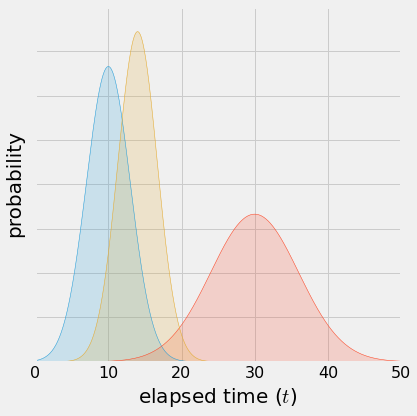

In [3]:
pD = normal_distribution(t, 10., 3.)         # prior
pDgivenH = normal_distribution(t, 30., 6.)   # likelihood
pHgivenD = posterior(pDgivenH * pD)       # posterior

fig, ax = plot_distribution(pD)
plot_distribution(pDgivenH, 
                  fig=fig, ax=ax)
plot_distribution(pHgivenD, 
                  fig=fig, ax=ax)
fig.tight_layout()
fig.savefig('Bayes_rule.pdf', transparent=True, dpi=300)

# Bayesian updating

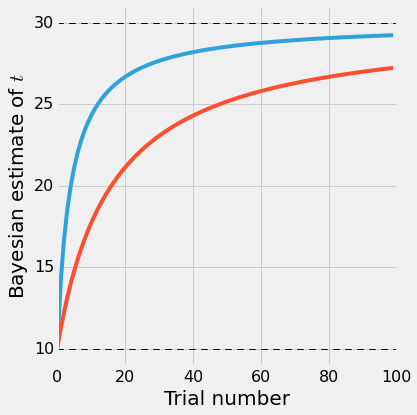

In [4]:
def bayesian_update(pD, pDgivenH, ntrials=100):
    point_estimate = zeros((ntrials,)) + distribution_mean(pD)
    ntrials = range(1, ntrials)
    for trial in ntrials:
        pD = posterior(pDgivenH * pD) # update the prior as the posterior.
        point_estimate[trial] = distribution_mean(pD)
    return point_estimate

def plot_bayesian_pe(point_estimate, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = subplots(figsize=(6,6))
    ntrials = list(range(point_estimate.size))
    ax.hlines([10, 30], 0, 100, 
              linestyle='--', lw=1)
    ax.plot(ntrials, point_estimate)
    ax.set_ylim((9, 31))
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Trial number', fontsize=20)
    ax.set_ylabel('Bayesian estimate of $t$', fontsize=20)
    return fig, ax

pD = normal_distribution(t, 10., 3.)         # prior
pDgivenH_small = normal_distribution(t, 30., 0.2*30)   # likelihood
pDgivenH_large = normal_distribution(t, 30., 0.4*30)   # likelihood

fig, ax = plot_bayesian_pe(bayesian_update(pD, pDgivenH_small))
plot_bayesian_pe(bayesian_update(pD, pDgivenH_large),
                fig=fig, ax=ax);
fig.tight_layout()
fig.savefig('Bayesian_updating.pdf', transparent=True, dpi=300)

# Statistical Decisions

##Beat the Clock

/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1590: RuntimeWarning: divide by zero encountered in true_divide
  x = asarray((x-loc)*1.0/scale)
/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1590: RuntimeWarning: invalid value encountered in true_divide
  x = asarray((x-loc)*1.0/scale)
/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1592: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (scale > 0) & (x >= self.a) & (x <= self.b)
/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1592: RuntimeWarning: invalid value encountered in less_equal
  cond1 = (scale > 0) & (x >= self.a) & (x <= self.b)


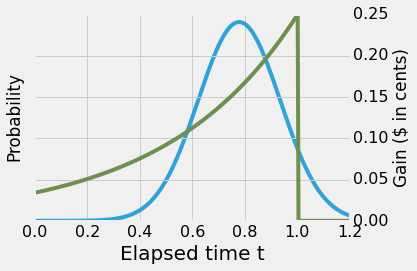

In [13]:
def get_g(beta, t, T):
    g = 0.25 * exp(-beta * ((T-t)/T))
    return where(t>T, 0, g)
    
def BTC(t, w, g):
    ev = zeros_like(t)
    for i, s in enumerate(t):
        p = normal_distribution(t, s, w*s)
        ev[i] = (p * g).sum()
    to = t[nanargmax(ev)]
    p = normal_distribution(t, to, w*to)
    return ev, to, p


beta, T, t = 2, 1, linspace(0, 3, 1000)
g = get_g(beta, t, T)
ev, to, p = BTC(t, 0.2, g)

fig, ax_p = subplots()
ax_p.plot(t, p,
         color=colors[0])
ax_p.set_ylabel('Probability')
ax_p.set_xlabel('Elapsed time t', fontsize=20)
ax_p.set_yticklabels('')
ax_p.tick_params(labelsize=16)
ax_p.set_yticks(linspace(ax_p.get_ybound()[0], 
                         ax_p.get_ybound()[1], 6));

ax_g = ax_p.twinx()
ax_g.plot(t, g,
         color=colors[3])
ax_g.set_xlim((0, 1.2))
ax_g.set_ylabel('Gain ($ in cents)')
ax_g.tick_params(labelsize=16)
ax_g.set_yticks(linspace(ax_g.get_ybound()[0], 
                         ax_g.get_ybound()[1], 6));
fig.tight_layout()
fig.savefig('BTC_a.pdf', transparent=True, dpi=300)

/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1590: RuntimeWarning: divide by zero encountered in true_divide
  x = asarray((x-loc)*1.0/scale)
/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1590: RuntimeWarning: invalid value encountered in true_divide
  x = asarray((x-loc)*1.0/scale)
/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1592: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (scale > 0) & (x >= self.a) & (x <= self.b)
/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1592: RuntimeWarning: invalid value encountered in less_equal
  cond1 = (scale > 0) & (x >= self.a) & (x <= self.b)


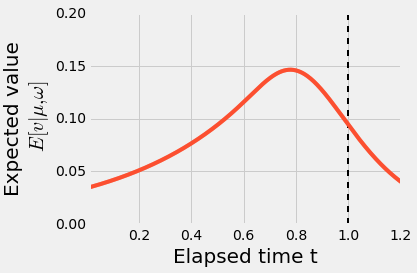

In [19]:
fig, ax = subplots()

ev_small = BTC(t, 0.2, g)[0]
ev_large = BTC(t, 0.4, g)[0]
ax.vlines(1, 0, 0.2, linestyle='--', linewidth=2)
ax.plot(t, ev, color=colors[1])
ax.plot(t, ev, color=colors[1], alpha=0.5)

ax.set_xlim((0.01, 1.2)) # chop off that ugliness in the beginning that's bunk anyway.
ax.set_xlabel('Elapsed time t', fontsize=20)
ax.set_ylabel('Expected value\n $E[v |\mu, \omega]$', fontsize=20);
fig.tight_layout()
fig.savefig('BTC_b.pdf', transparent=True, dpi=300)

##DRL

/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1671: RuntimeWarning: divide by zero encountered in true_divide
  x = (x-loc)*1.0/scale
/Users/davidfreestone/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


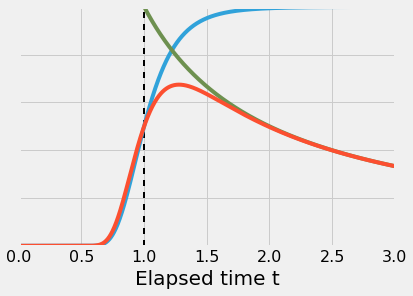

In [28]:
w = 0.2

p = 1 - normalcdf(1, t, w*t)
g = 1 / t
ev = p * g

fig, ax = subplots()
ax.vlines(1, 0, 1, linestyle='--', linewidth=2)
ax.plot(t, p, color=colors[0])
ax.plot(t, g, color=colors[3])
ax.plot(t, ev, color=colors[1])
ax.set_ylim((0, 1))
ax.tick_params(labelsize=16)
ax.set_yticklabels('')
ax.set_xlabel('Elapsed time t', fontsize=20)
fig.savefig('DRL.pdf', transparent=True, dpi=300)

## Switch task

/Users/davidfreestone/anaconda/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1671: RuntimeWarning: divide by zero encountered in true_divide
  x = (x-loc)*1.0/scale


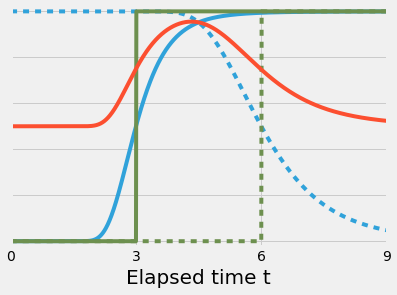

In [53]:
t = linspace(0, 9, 1000)
g_short = (t > 3).astype(float)
g_long = (t > 6).astype(float)

p_short = 1 - normalcdf(3, t, 0.2*t)
p_long = normalcdf(6, t, 0.2*t)

ev = 0.5*p_short + 0.5*p_long

fig, ax = subplots()

ax.plot(t, p_short, color=colors[0])
ax.plot(t, p_long, color=colors[0], linestyle='--')

ax.plot(t, g_short, color=colors[3])
ax.plot(t, g_long, color=colors[3], linestyle='--')

ax.plot(t, ev, color=colors[1])
ax.set_ylim((-0.02, 1.02))

ax.set_xticks((0, 3, 6, 9))
ax.set_xlabel('Elapsed time t', fontsize=20)
ax.set_yticklabels('')
fig.savefig('Switch.pdf', transparent=True, dpi=300)